In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import nan # importing nan to avoid overlapping in plotting datas
from datetime import datetime
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path of our dataframe
data_path = "/content/drive/MyDrive/10. Meteotrentino/Dati csv convalidati/radiazione_solare_A.csv"

In [4]:
# loading in pandas dataframe
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [5]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

In [6]:
df #Printing table

,label,date,time,value,validation_code
0,T0010,01/01/2014,00:00,0.0,1
1,T0010,01/01/2014,00:15,0.0,1
2,T0010,01/01/2014,00:30,0.0,1
3,T0010,01/01/2014,00:45,0.0,1
4,T0010,01/01/2014,01:00,0.0,1
...,...,...,...,...,...
8660686,T0469,31/12/2021,22:45,0.0,1
8660687,T0469,31/12/2021,23:00,0.0,1
8660688,T0469,31/12/2021,23:15,0.0,1
8660689,T0469,31/12/2021,23:30,0.0,1


In [7]:
# Reducing every validation code in good or bad
# 0 "good", 1 "bad"
df["validation_code"] = np.where(df["validation_code"] == 1, 0, 1)

In [8]:
string_to_plot = "11/09/2016" #@param {type:"string"}
station_num = "T0360" #@param {type:"string"}

# Converting string in to datetime
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
date_to_plot = datetime.strptime(string_to_plot, '%d/%m/%Y')

# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
                  (df['date'] == date_to_plot)]

# Split good and bad data into 2 samples 
y_good_samples = np.where(df_filtered["validation_code"] == 0, df_filtered.value, nan)
y_bad_samples = np.where(df_filtered["validation_code"] == 0, nan, df_filtered.value)

# Define the x axis value
x_plot = df_filtered.time


In [9]:
df_filtered

,label,date,time,value,validation_code
4013244,T0360,2016-09-11,00:00,0.0,0
4013245,T0360,2016-09-11,00:15,0.0,0
4013246,T0360,2016-09-11,00:30,0.0,0
4013247,T0360,2016-09-11,00:45,0.0,0
4013248,T0360,2016-09-11,01:00,0.0,0
...,...,...,...,...,...
4013335,T0360,2016-09-11,22:45,220.5,1
4013336,T0360,2016-09-11,23:00,220.4,1
4013337,T0360,2016-09-11,23:15,220.5,1
4013338,T0360,2016-09-11,23:30,220.5,1


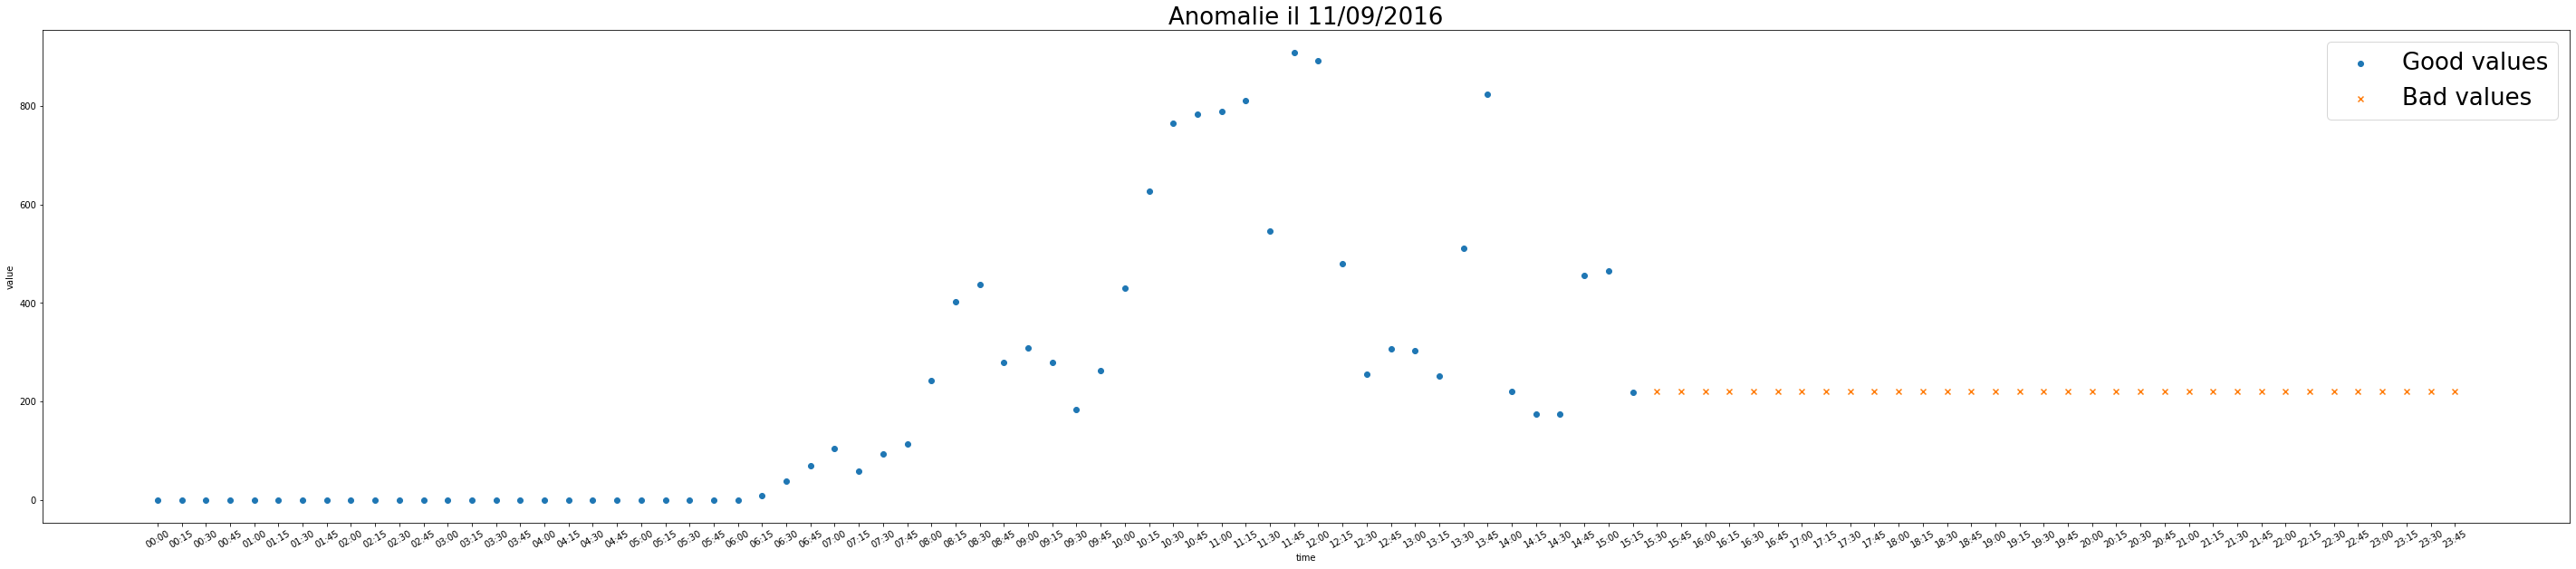

In [10]:
# Reshaping the plot
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(10)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title('Anomalie il ' +string_to_plot ,fontsize = 26)
plt.ylabel('value')
plt.xlabel('time')

# Define tick label to avoid overlapping
ax.set_xticklabels(x_plot,rotation=30)

# Plotting datas with different markers
plt.scatter(x_plot, y_good_samples, marker ="o")
plt.scatter(x_plot, y_bad_samples, marker="x")

# Making a legend
ax.legend(['Good values', 'Bad values'], prop={'size': 26})

# Visualize
plt.show()